In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Figure 7

In [2]:
def readCSV(file_path):
    df = pd.read_csv(file_path)
    return df
df1 = pd.read_csv('all_results/all_mnistL2.csv')
df2 = pd.read_csv('all_results/all_mnistL4.csv')
df3 = pd.read_csv('all_results/all_oval21_base.csv')
df4 = pd.read_csv('all_results/all_oval21_deep.csv')
df5 = pd.read_csv('all_results/all_oval21_wide.csv')
combined_df = pd.concat([df1, df2, df3, df4, df5], axis=0)   

# Mean of certified and falsified instances


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def RQ2csv(file_path):
    column_names = ["id","eps",
                    'bab_baseline', 'bab_baseline_time', 'bab_baseline_visit', 'bab_baseline_status',
                    "abcrown","abcrown_status","abcrown_time",
                    "neuralsat","neuralsat_time", "neuralsat_status",
                    'oliva_greedy','oliva_greedy_time', 'oliva_greedy_visit', 'oliva_greedy_status', 'oliva_greedy_lb',
                    'oliva_balance','oliva_balance_time','oliva_balance_visit', 'oliva_balance_status','oliva_balance_lb',
                    ]
    dataframe = pd.read_csv(file_path, sep=",", header=None, names=column_names)
    return dataframe



In [6]:
def plot_ratio_boxplots(df, save_path=None):
    # Set global font sizes
    plt.rcParams.update({
        'font.size': 14,          # Base font size
        'axes.labelsize': 16,     # Axis labels
        'axes.titlesize': 16,     # Axis title
        'xtick.labelsize': 16,    # X-axis tick labels
        'ytick.labelsize': 14,    # Y-axis tick labels
        'legend.fontsize': 14,    # Legend text
        'legend.title_fontsize': 14  # Legend title
    })
    
    # Create filtered datasets
    adv_df = df[df['oliva_greedy_status'] == "Status.ADV_EXAMPLE"].copy()
    verified_df = df[df['oliva_greedy_status'] == "Status.VERIFIED"].copy()
    
    # Create plotting data
    plot_data = []
    
    # Calculate ratios for greedy method
    adv_greedy_ratio = adv_df['bab_baseline_time'] / adv_df['oliva_greedy_time']
    verified_greedy_ratio = verified_df['bab_baseline_time'] / verified_df['oliva_greedy_time']
    
    # Calculate ratios for balance method
    adv_balance_ratio = adv_df['bab_baseline_time'] / adv_df['oliva_balance_time']
    verified_balance_ratio = verified_df['bab_baseline_time'] / verified_df['oliva_balance_time']
    
    # Add data to plot_data list with updated method names
    plot_data.extend([
        {'ratio': r, 'status': 'Violated instance', 'method': 'Oliva$^{GR}$'} for r in adv_greedy_ratio
    ])
    plot_data.extend([
        {'ratio': r, 'status': 'Certified instance', 'method': 'Oliva$^{GR}$'} for r in verified_greedy_ratio
    ])
    plot_data.extend([
        {'ratio': r, 'status': 'Violated instance', 'method': 'Oliva$^{SA}$'} for r in adv_balance_ratio
    ])
    plot_data.extend([
        {'ratio': r, 'status': 'Certified instance', 'method': 'Oliva$^{SA}$'} for r in verified_balance_ratio
    ])
    
    # Convert to DataFrame
    plot_df = pd.DataFrame(plot_data)
    
    # Create figure with larger size to accommodate larger fonts
    plt.figure(figsize=(7, 5))
    
    # Set custom colors
    custom_colors = ['#1abc9c', '#e74c3c']
    
    # Create boxplot with reduced width and no fliers (outliers)
    sns.boxplot(data=plot_df, x='status', y='ratio', hue='method', width=0.5, fliersize=0, palette=custom_colors)
    
    # Plot mean points with label for legend (only need to do this once)
    mean_line = plt.plot([], [], 'ko', markersize=6, label='Mean')[0]
    
    # Calculate and annotate mean values
    for i, status in enumerate(['Violated instance', 'Certified instance']):
        for j, method in enumerate(['Oliva$^{GR}$', 'Oliva$^{SA}$']):
            mean_val = plot_df[(plot_df['status'] == status) & 
                             (plot_df['method'] == method)]['ratio'].mean()
            # Calculate x-position: i is the status position, j*0.25 offsets between methods
            x_pos = i + (-0.125 + j*0.25)  # Base position
            
            # Add black dot for mean
            plt.plot(x_pos, mean_val, 'ko', markersize=6)
            
            # Add text annotation with horizontal offset based on method
            text_x_offset = -0.1 if method == 'Oliva$^{GR}$' else 0.1  # Offset left for GR, right for SA
            plt.text(x_pos + text_x_offset, mean_val , f'$\\mathbf{{{mean_val:.2f}}}$', 
                    horizontalalignment='center',
                    verticalalignment='bottom',
                    fontsize=12)
    
    # Add reference line
    ref_line = plt.axhline(y=1, color='r', linestyle='--', alpha=0.5, label='Ratio=1')
    
    # Set labels and title
    plt.xlabel('')
    plt.ylabel('Speedup Ratio (BaB-baseline / Oliva)')
    
    # Add grid
    plt.grid(True, alpha=0.3)
    
    # Get current handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()
    # Rearrange to put Mean and Ratio=1 at the end
    method_handles = handles[:-2]  # Original method handles
    method_labels = labels[:-2]    # Original method labels
    # Add Mean and Ratio=1 handles/labels
    handles = method_handles + [mean_line, ref_line]
    labels = method_labels + ['Mean', 'Ratio=1']
    
    # Customize legend with all elements
    plt.legend(handles, labels, title='Method', loc='upper right')
    
    # Set y-axis limit to 10
    plt.ylim(0, 10)
    
    # Adjust layout to prevent text cutoff
    plt.tight_layout()
    
    # Save plot if save_path is provided
    if save_path:
        plt.savefig(save_path, format='pdf', bbox_inches='tight', dpi=300)
    
    return plt

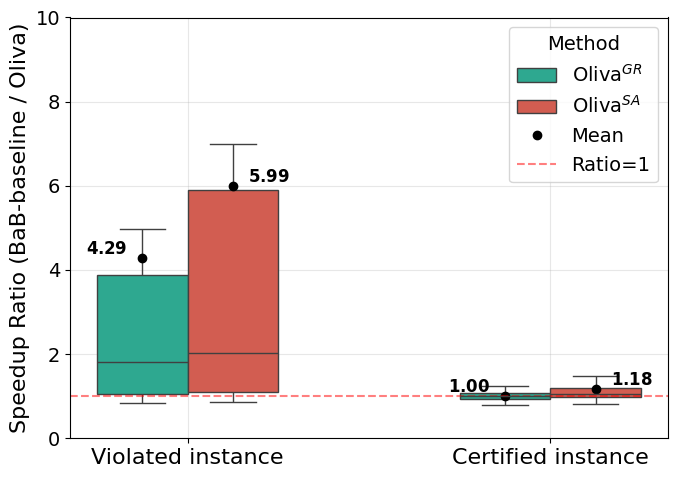

In [7]:

df = RQ2csv("all_results/0.csv")
plot = plot_ratio_boxplots(df, "figure5_mnstl2.pdf")
plot.show()

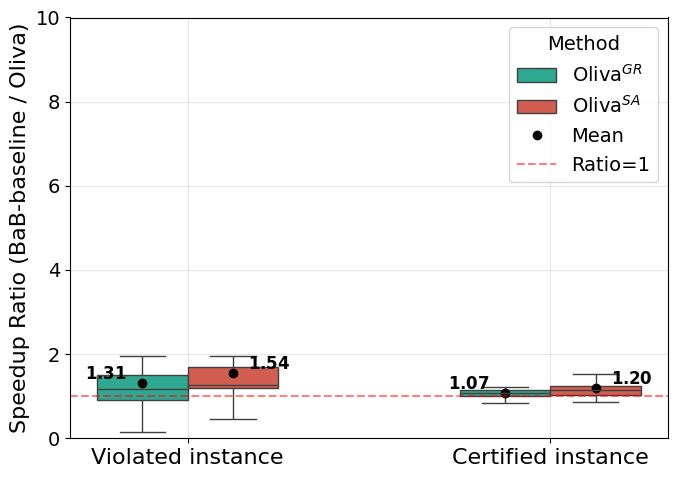

In [8]:
df = RQ2csv("all_results/1.csv")
plot = plot_ratio_boxplots(df,"figure5_mnstl4.pdf")
plot.show()

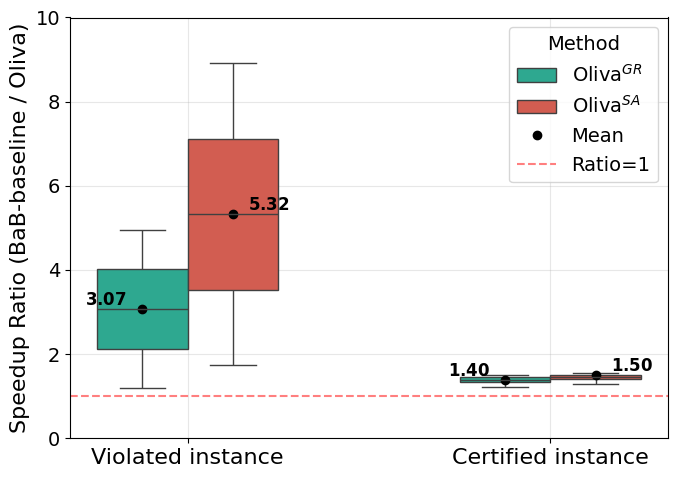

In [9]:
df = RQ2csv("all_results/2.csv")
plot = plot_ratio_boxplots(df, "figure5_base.pdf")
plot.show()

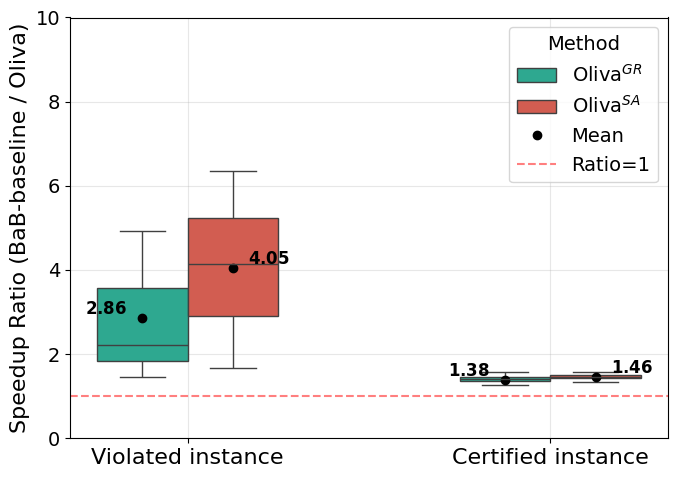

In [10]:
df = RQ2csv("all_results/3.csv")
plot = plot_ratio_boxplots(df, "figure5_deep.pdf")
plot.show()

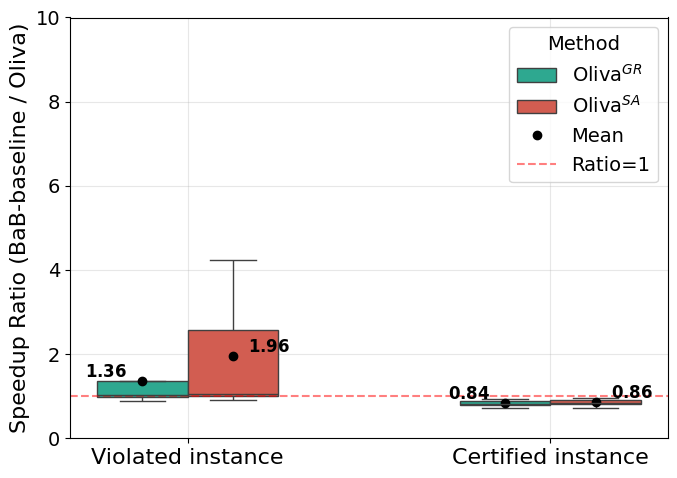

In [11]:
df = RQ2csv("all_results/4.csv")
plot = plot_ratio_boxplots(df, "figure5_wide.pdf")
plot.show()